# Exercizes on clustering

Here you can find a program to read a data file in csv format. 

The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
    
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [ ]:
import csv
import sys
from os.path import join

import numpy as np
 
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       print("n_samples=")
       print(n_samples)
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="content/"
#file_path="./sample_data/"
file_path="./"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
print("dataset n. 1: n samples, n features")
print(n_samples1, n_features1)
print("dataset n. 2: n samples, n features")
print(n_samples2, n_features2)
print("dataset n. 3: n samples, n features")
print(n_samples3, n_features3)

n_samples=
150
n_samples=
6118
n_samples=
86558
dataset n. 1: n samples, n features
150 2
dataset n. 2: n samples, n features
6118 2
dataset n. 3: n samples, n features
86558 2


The following program plots the dataset n.1

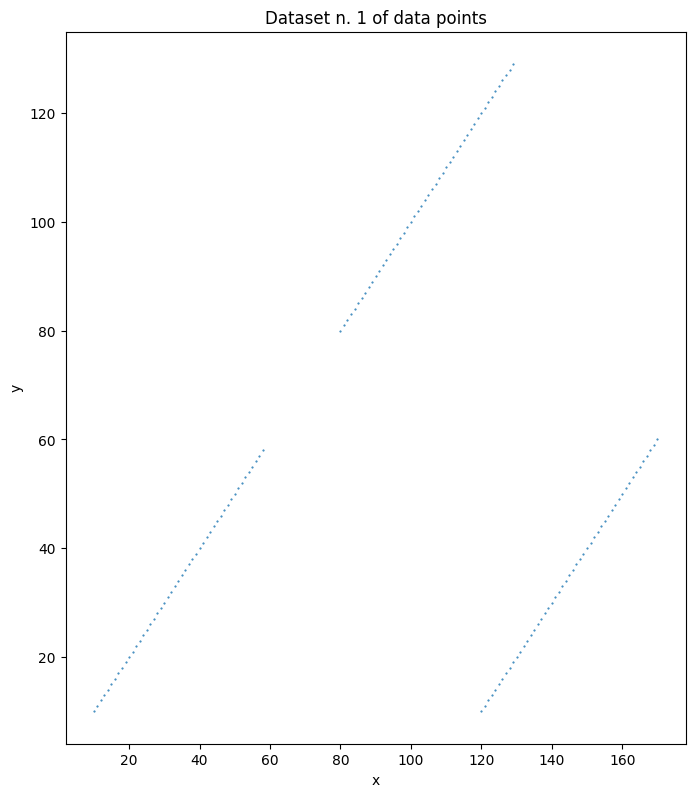

In [87]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')

ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])

#plot the dataset
plt.plot(data1[:,0], data1[:,1], '.',markersize=1)

plt.show()

The following is the program for plotting the dataset n.2

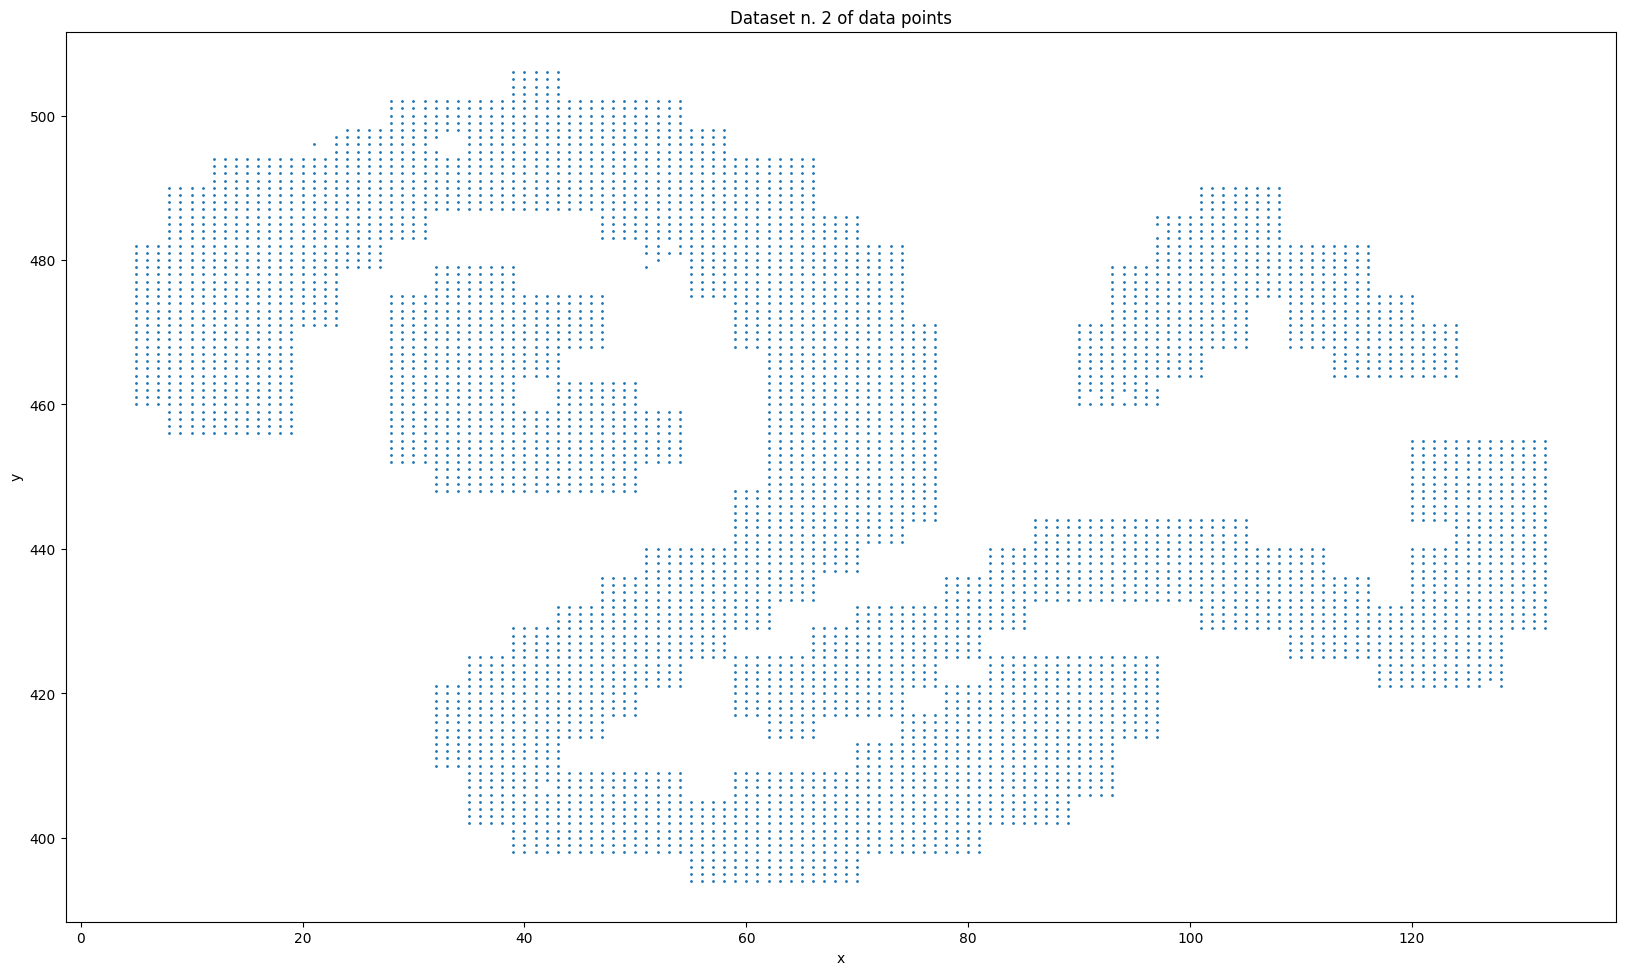

In [88]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')

ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

#plot the dataset
plt.plot(data2[:,0], data2[:,1], '.', markersize=2)

plt.show()

The following is the program for plotting the dataset n.3

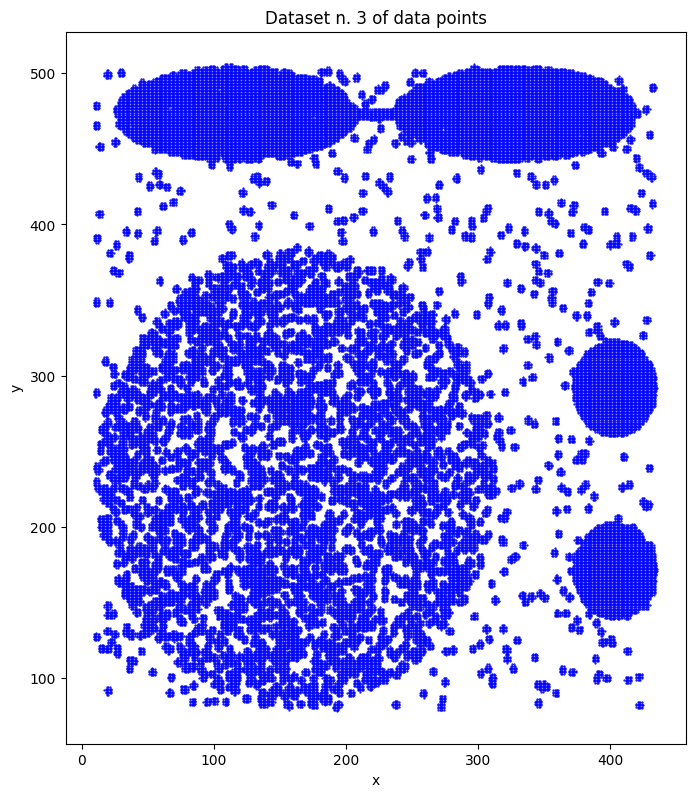

In [89]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

#plot the dataset
plt.plot(data3[:,0], data3[:,1], '.', markersize=1.2, markeredgecolor = 'blue')

plt.show()

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [90]:
import csv
import sys
from os.path import join

import numpy as np
 
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="~/meo/Documents/Didattica/Laboratorio-15-16-Jupyter/"
#file_path="./sample_data/"
file_path="./"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"

data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)

from sklearn.cluster import KMeans

np.random.seed(5)

k=3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

i=0
for i in range(n_samples1):
    print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")
    print("in cluster n."+str(kmeans1.labels_[i]))

Example n.0=(10.0,10.0)
in cluster n.1
Example n.1=(11.0,11.0)
in cluster n.1
Example n.2=(12.0,12.0)
in cluster n.1
Example n.3=(13.0,13.0)
in cluster n.1
Example n.4=(14.0,14.0)
in cluster n.1
Example n.5=(15.0,15.0)
in cluster n.1
Example n.6=(16.0,16.0)
in cluster n.1
Example n.7=(17.0,17.0)
in cluster n.1
Example n.8=(18.0,18.0)
in cluster n.1
Example n.9=(19.0,19.0)
in cluster n.1
Example n.10=(20.0,20.0)
in cluster n.1
Example n.11=(21.0,21.0)
in cluster n.1
Example n.12=(22.0,22.0)
in cluster n.1
Example n.13=(23.0,23.0)
in cluster n.1
Example n.14=(24.0,24.0)
in cluster n.1
Example n.15=(25.0,25.0)
in cluster n.1
Example n.16=(26.0,26.0)
in cluster n.1
Example n.17=(27.0,27.0)
in cluster n.1
Example n.18=(28.0,28.0)
in cluster n.1
Example n.19=(29.0,29.0)
in cluster n.1
Example n.20=(30.0,30.0)
in cluster n.1
Example n.21=(31.0,31.0)
in cluster n.1
Example n.22=(32.0,32.0)
in cluster n.1
Example n.23=(33.0,33.0)
in cluster n.1
Example n.24=(34.0,34.0)
in cluster n.1
Example n.

In the following program we plot the clusters

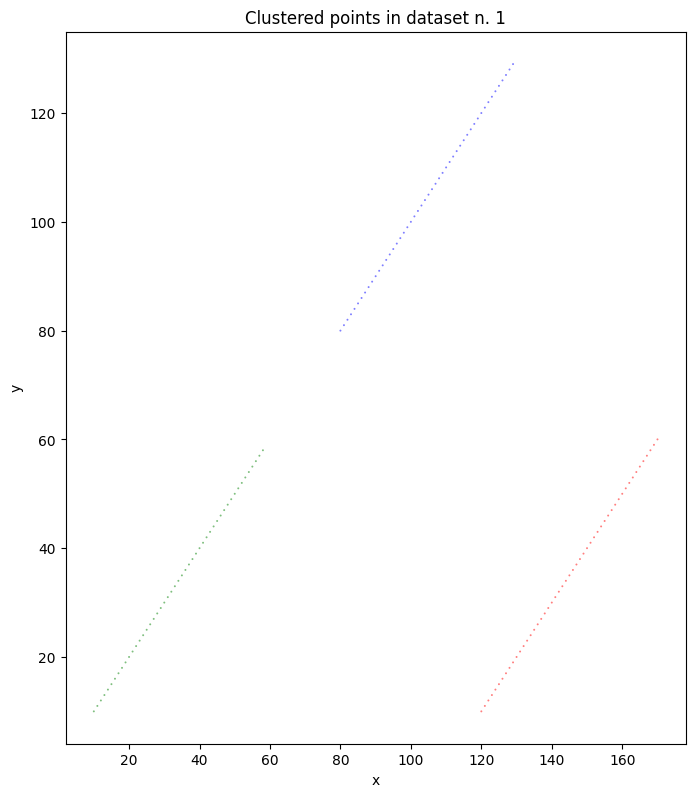

In [91]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

Nella cella seguente ti propongo di eseguire il clustering con K-means sul dataset2.

In [92]:
k = 5 # Numero di cluster da utilizzare nel K-means
kmeans2 = KMeans(k) # Creazione del modello K-means con k cluster
kmeans2.fit(data2) # Addestramento del modello sul dataset  

KMeans(n_clusters=5)

Di seguito devi tracciare i risultati del clustering sul dataset2.

**Answer:**
come spieghi cosa succede?



In [1]:
def plotClusters(dataset, model, k, title):
    fig = plt.figure(figsize=(8, 8))

    ax = fig.add_subplSot(111)
    fig.subplots_adjust(top=1)
    ax.set_title(title)

    ax.set_xlabel("x")
    ax.set_ylabel("y")

   # imposta l'elenco dei colori da selezionare quando si tracciano i diversi cluster
    color = ["b", "g", "r", "c", "m", "y", "k", "w"]

    for cluster in range(k):
        clusterx = [
            data[0] for (data, pred) in zip(dataset, model.labels_) if pred == cluster
        ]
        clustery = [
            data[1] for (data, pred) in zip(dataset, model.labels_) if pred == cluster
        ]
        c = color[cluster]
        plt.scatter(clusterx, clustery, c=c)

 # Tracciare i possibili punti rumorosi
    clusterx = [data[0] for (data, pred) in zip(dataset, model.labels_) if pred == -1]
    clustery = [data[1] for (data, pred) in zip(dataset, model.labels_) if pred == -1]
    c = "r"
    plt.scatter(clusterx, clustery, c=c, marker="*")

    plt.show()

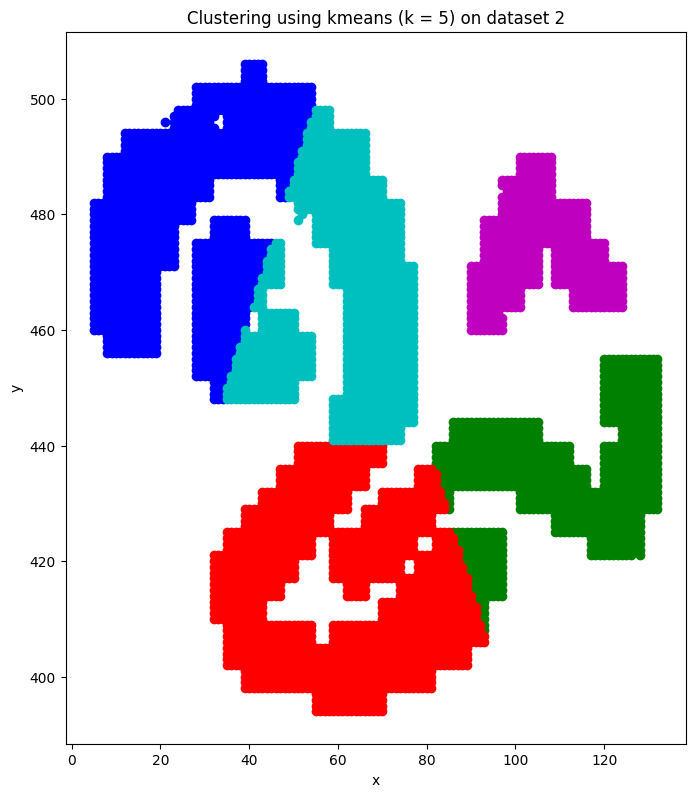

In [94]:
plotClusters(data2, kmeans2, k, f"Clustering using kmeans (k = {k}) on dataset 2")

Nella cella seguente vi propongo di eseguire il clustering con K-means sul dataset 3.

In [95]:
k = 5
kmeans3 = KMeans(k)
kmeans3.fit(data3)

KMeans(n_clusters=5)

Nella cella seguente, ti propongo di tracciare i risultati del clustering sul dataset3.

**Answer:** 
come spieghi cosa succede?

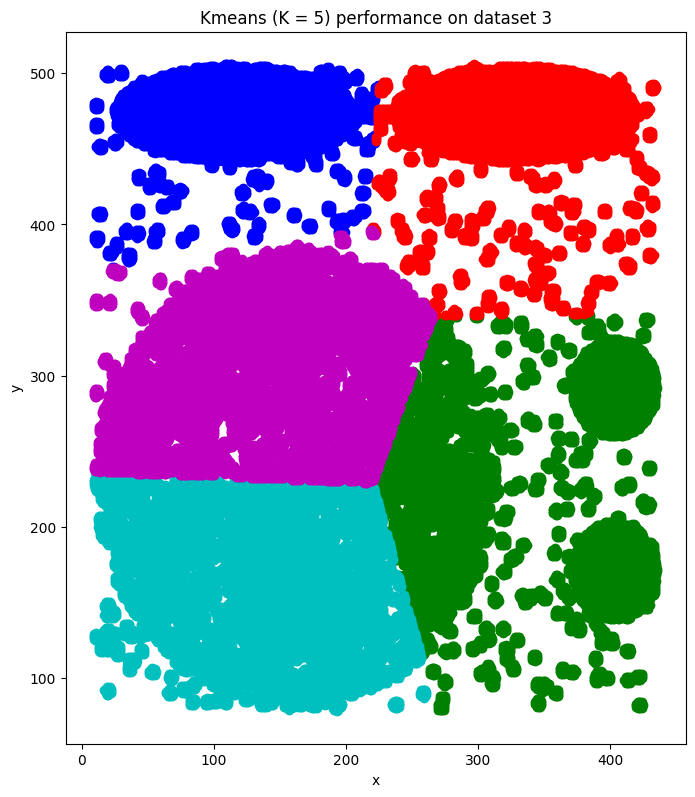

In [96]:
plotClusters(data3, kmeans3, k, f"Kmeans (K = {k}) performance on dataset 3")

Nelle celle seguenti ti propongo di scrivere un programma che calcola con una misura statistica di tua scelta una valutazione quantitativa dei cluster nei tre set di dati.

**Nota:**
È consigliabile eseguire K-means un certo numero di volte (proviamo 10 volte) e quindi selezionare la soluzione di clustering che fornisce il miglior valore della misura di valutazione.

In [97]:
from sklearn.metrics import silhouette_score
k = 5
for dataset in [data1, data2]:
    model = KMeans(k, n_init=10)
    model.fit(dataset)
    print(silhouette_score(dataset, model.labels_))

0.6372722940289592
0.4250614869544094


Come già fatto con la classificazione per k-nn, traccia nella cella sottostante la misura quantitativa di tua scelta (usata sopra) rispetto a un valore crescente di k (il numero di cluster), in modo da poter selezionare il miglior valore di k.

[[np.float64(0.5651096232579514), np.float64(0.7229402453727759), np.float64(0.6824925173029859), np.float64(0.6372722940289592), np.float64(0.6113129278986535), np.float64(0.5955873805414488), np.float64(0.5802064233248967), np.float64(0.5655359282754998)], [np.float64(0.43322366812579544), np.float64(0.4798818451822113), np.float64(0.4169396490754845), np.float64(0.42562790872278156), np.float64(0.41191165463185525), np.float64(0.4341649132105639), np.float64(0.4453878379642862), np.float64(0.4475606112512615)]]


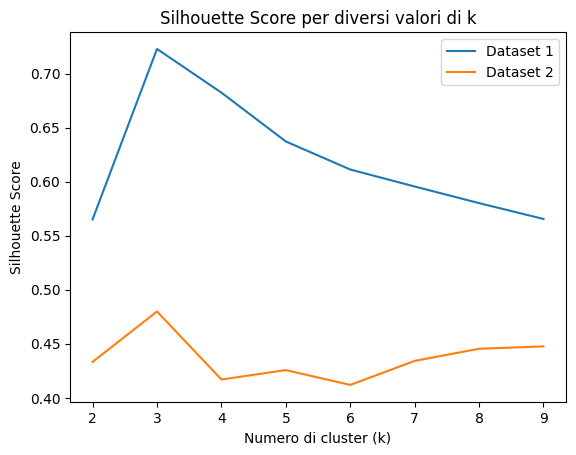

In [98]:
silhouettes = []
# No dataset 3 perché impiega molto tempo per calcolare la silhouette
for i, dataset in enumerate([data1, data2]):
    silhouettes.append([])
    for k in range(2, 10):
        model = KMeans(k, n_init=15)
        model.fit(dataset)
        score = silhouette_score(dataset, model.labels_)
        silhouettes[i].append(score)

print(silhouettes)

import matplotlib.pyplot as plt

for i, scores in enumerate(silhouettes):
    plt.plot(range(2, 10), scores, label=f"Dataset {i+1}")
plt.xlabel("Numero di cluster (k)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.title("Silhouette Score per diversi valori di k")
plt.show()

Nella cella seguente ti propongo di eseguire DBSCAN, invece, su uno degli ultimi due dataset: dataset2 o dataset3.

All'inizio prova a usare una coppia di Minpts ed Eps a tua scelta.

**Nota:**
Se i dati sono troppo grandi, **campionali casualmente, usando un fattore di 0,1.**

Numero di cluster trovati: 7


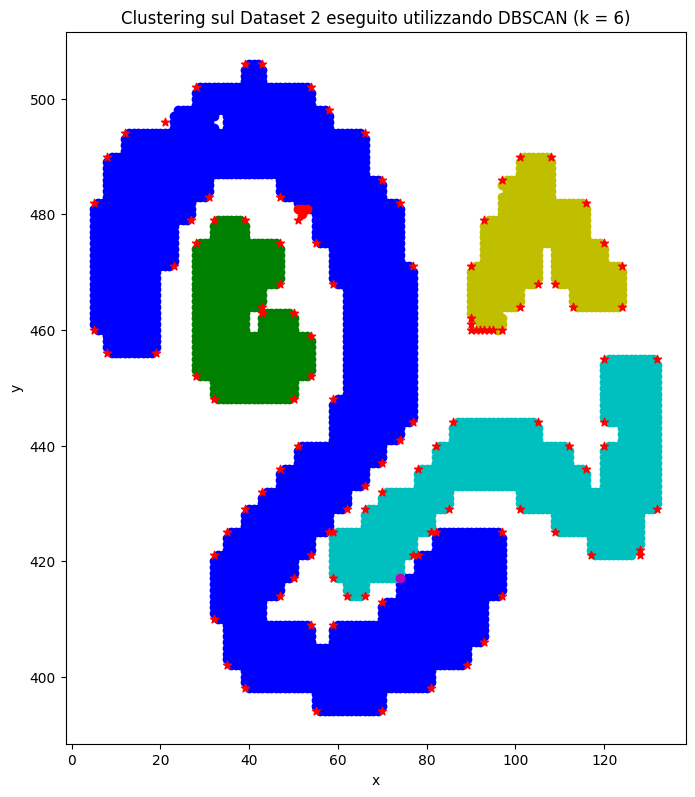

Silhouette score: -0.2183765056099809


In [99]:

from sklearn.cluster import DBSCAN

dbscan2 = DBSCAN(eps=1.4, min_samples=5)
dbscan2.fit(data2)

k = len(set(dbscan2.labels_))
print(f"Numero di cluster trovati: {k}")
plotClusters(
    data2,
    dbscan2,
    k - 1,
    f"Clustering sul Dataset 2 eseguito utilizzando DBSCAN (k = {k-1})",
)  # Il k - 1 è dovuto al fatto che dbscan utilizza anche un valore speciale -1 per indicare i punti rumorosi
data2_filtered = [x for x, y in zip(data2, dbscan2.labels_) if y != -1]
labels_filtered = [y for y in dbscan2.labels_ if y != -1]
score = silhouette_score(data2_filtered, labels_filtered)

print(f"Silhouette score: {score}")


Nella cella seguente ti propongo di:

1. Impostare *Minpts* su un numero (diciamo **10**).
2. Calcolare la **distanza di raggiungibilità** del **10° vicino più prossimo** per ogni punto dati.
3. Ordinare l'insieme delle distanze di raggiungibilità ottenute in modo crescente.
4. Tracciare le distanze di raggiungibilità ordinate
5. Trovare il **gomito** del diagramma => fornisce il valore eps combinato con Minpts=10.
6. Provare questa coppia combinata di parametri sul set di dati scelto, con DBSCAN.

In [100]:
from sklearn.metrics import DistanceMetric

dist = DistanceMetric.get_metric("euclidean")
#minpts = 10
minpts = 15
dataset = data2

all_distances = dist.pairwise(dataset, dataset)
result = []
for distances in all_distances:
    d = sorted(distances)
    m_d = d[minpts]
    result.append(m_d)
print(result)

[np.float64(3.605551275463989), np.float64(3.1622776601683795), np.float64(3.0), np.float64(3.0), np.float64(3.0), np.float64(3.0), np.float64(3.0), np.float64(3.0), np.float64(3.0), np.float64(3.0), np.float64(3.0), np.float64(3.0), np.float64(3.0), np.float64(3.0), np.float64(3.0), np.float64(3.0), np.float64(3.0), np.float64(3.0), np.float64(3.0), np.float64(3.0), np.float64(3.0), np.float64(3.1622776601683795), np.float64(3.605551275463989), np.float64(3.0), np.float64(2.8284271247461903), np.float64(2.23606797749979), np.float64(2.23606797749979), np.float64(2.23606797749979), np.float64(2.23606797749979), np.float64(2.23606797749979), np.float64(2.23606797749979), np.float64(2.23606797749979), np.float64(2.23606797749979), np.float64(2.23606797749979), np.float64(2.23606797749979), np.float64(2.23606797749979), np.float64(2.23606797749979), np.float64(2.23606797749979), np.float64(2.23606797749979), np.float64(2.23606797749979), np.float64(2.23606797749979), np.float64(2.23606797

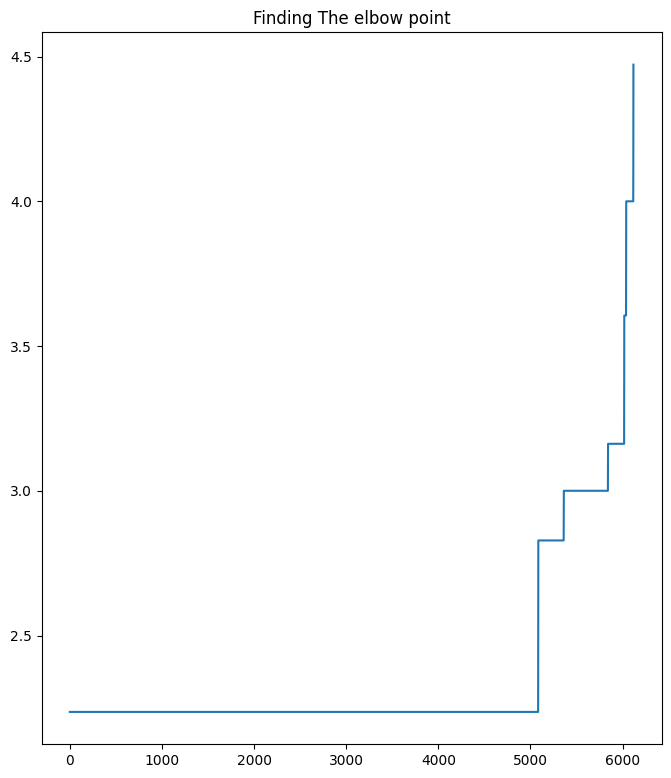

In [101]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title("Finding The elbow point")

result_sorted = sorted(result)

plt.plot(result_sorted)

plt.show()


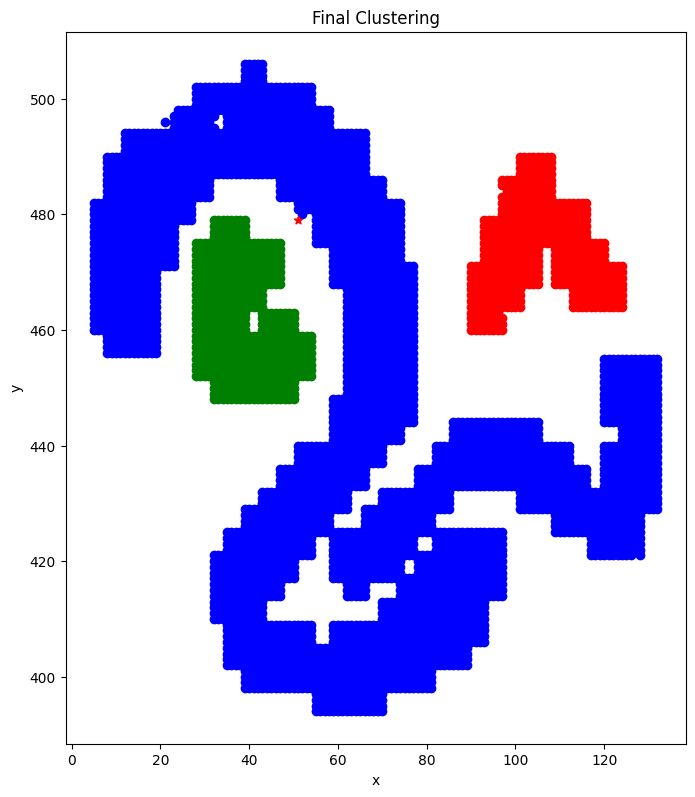

In [102]:
# Usando minpts e 2.5 come eps per vedere come funziona
dbscan_opt = DBSCAN(eps=2.5, min_samples=minpts)
#dbscan_opt = DBSCAN(eps=3, min_samples=minpts)
dbscan_opt.fit(dataset)

#print(len(set(dbscan_opt.labels_)))
plotClusters(dataset, dbscan_opt, len(set(dbscan_opt.labels_)) - 1, "Final Clustering")